In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

from ROOT import TLorentzVector

Welcome to JupyROOT 6.19/01


In [2]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/mnt/10Ti/lihuang/combinatory/data/mg5_data/pp2tt_decay_python/SubProcesses')
import allmatrix2py



In [3]:
lhe_file = "/mnt/10Ti/lihuang/combinatory/data/mg5_data/pp2tt/Events/run_01_0/unweighted_events.lhe"

with open(lhe_file, 'r') as f:
    lines = f.readlines()
    

In [4]:
%%time
count = 0
event_info = []
for line in lines:
    if(line=='</init>\n'):
        print ("Start Events")
    if(line=='<event>\n'):
        count+=1
        one_event_info = []
    if(count>=1):
        line = line.split()
        if(line[0].lstrip('-+').isdigit()):
            if(len(line)==13 and int(line[0]) in (1, 2, 3, 4, -1, -2, -3, -4, 21, -11, -12, -13, -14, 11, 12, 13, 14, 5, -5)):
                one_event_info.append([float(line[9]), float(line[6]), float(line[7]),  float(line[8]), int(line[0]), float(line[12])])
                
    if(line==['<event>']):
        event_info.append(one_event_info)
                

        
event_info = np.array(event_info)


Start Events
CPU times: user 39.6 s, sys: 570 ms, total: 40.2 s
Wall time: 40 s


In [5]:
allmatrix2py.initialise('/mnt/10Ti/lihuang/combinatory/data/mg5_data/pp2tt_decay_python/Cards/param_card.dat')

def invert_momenta(p):
    """ fortran/C-python do not order table in the same order"""
    new_p = []
    for i in range(len(p[0])):
        new_p.append([0]*len(p))
    for i, onep in enumerate(p):
        for j, x in enumerate(onep):
            new_p[j][i] = x
    return new_p

def cal_smatrix(p, nhel, pdgs, scale2=0., alphas=0.13):
    p, nhel, pdgs = p, nhel, pdgs
    p = invert_momenta(p)
    ans = allmatrix2py.smatrixhel(pdgs, p, alphas, scale2, nhel)
    return ans


In [6]:
%%time
result = []
for event in event_info:
    p = event[:,[0, 1, 2, 3]]
    flip_p = [p[0], p[1], p[2], p[3], p[7], p[5], p[6], p[4]]
    flip_p = np.array(flip_p)
    nhel = -1
    pdgs = event[:,4]
    if(pdgs[0]<0 and pdgs[1]>0):
        pdgs[0], pdgs[1] = pdgs[1], pdgs[0]
        p[0], p[1] = p[1], p[0]
        flip_p[0], flip_p[1] = flip_p[1], flip_p[0]
    #pdgs = [ 21.,  21., -11.,  12.,   5.,  13., -14.,  -5.]
    #ans = cal_smatrix(p=p, nhel=nhel, pdgs=pdgs)
    #flip_ans = cal_smatrix(p=flip_p, nhel=nhel, pdgs=pdgs)
    ans = cal_smatrix(p=p, nhel=nhel, pdgs=pdgs)
    flip_ans = cal_smatrix(p=flip_p, nhel=nhel, pdgs=pdgs)

    #print (ans, flip_ans)
    #break
    result.append([ans, flip_ans])
    
result = np.array(result)

CPU times: user 1min 10s, sys: 870 ms, total: 1min 11s
Wall time: 1min 10s


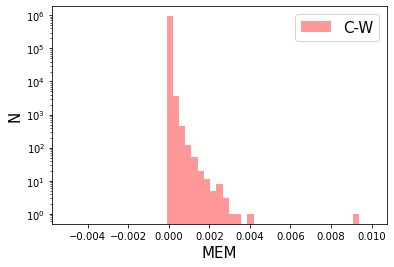

In [7]:
plt.hist(result[:,0]-result[:,1], bins=np.linspace(-0.005, 0.01), color='r', alpha=0.4, label='C-W')
plt.legend(loc='best', fontsize=15)
plt.xlabel("MEM", fontsize=15)
plt.ylabel("N", fontsize=15)
plt.yscale('log')
plt.show()


In [8]:
sum(result[:,0]>result[:,1])/len(result)


0.938481